In [1]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from withClustAnalysis import *
from PixelEM import * 

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
# compile MV PRJ result from each cluster to CSV
MV_df = compile_cluster_MV_prj_into_csv()
# Pick best clusters for each object sample based on MV
best_clust_df = best_worker_picking()
# compile all algo and MV PRJs into one big table
df = compile_all_algo_PRJs()
# compile the best threshold PRJs into one big table with algo as a column
#df_best_thresh = compile_best_thresh_all_algo_PRJs()
# Extracting important clusters only
# best_clust_best_thresh_df = filter_best_clust(df_best_thresh,best_clust_df)
best_clust_best_thresh_df  = filter_best_clust(df,best_clust_df)

In [5]:
# #exclude small area objects
# small_area=[11,15]

# best_clust_best_thresh_df= best_clust_best_thresh_df[~best_clust_best_thresh_df.objid.isin(small_area)]
# best_clust_no_thresh_df= best_clust_no_thresh_df[~best_clust_no_thresh_df.objid.isin(small_area)]

### Performance as it varies with number of workers

In [6]:
# MV should be the same, whether best thresh picked or not (since MV indept of thresh)
# assert best_clust_best_thresh_df[best_clust_best_thresh_df["algo"]=="MV"]["j"].mean() == best_clust_no_thresh_df["J [MV]"].mean()

In [7]:
#best_thres_best_clust_df[["objid","J [GTLSA]"]]#.objid.unique()#.groupby("num_workers")["J [MV]"]

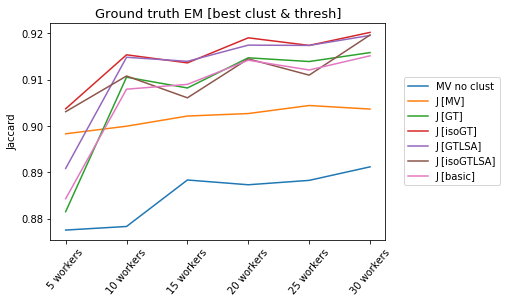

In [11]:
Nworker_performance = best_clust_best_thresh_df.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
# original "whole" MV PRJ for every object table --> MV_noClust : MV with no clustering
MV = pd.read_csv("pixel_em/MV_PRJ_table.csv") 
MV_noClust = np.array(MV.groupby("num_workers").mean()["MV_jaccard"])
plt.plot(MV_noClust,label="MV no clust")

for algo in metric_J:
    plt.plot(np.array(Nworker_performance[algo]),label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM [best clust & thresh]",fontsize=13)

In [12]:
print "isoGTLSA_best_clust_thresh=",list(Nworker_performance['J [isoGTLSA]'])
print "isoGT_best_clust_thresh=",list(Nworker_performance['J [isoGT]'])

isoGTLSA_best_clust_thresh= [0.90307821216941164, 0.91078223067499475, 0.90607202115964414, 0.91447871328211938, 0.91096930916946339, 0.91962648032280192]
isoGT_best_clust_thresh= [0.90370842070887658, 0.91535647767820261, 0.91361309274310576, 0.9190222529098161, 0.9173854347631728, 0.92019369603060786]
